# Imports.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from sklearn.model_selection import train_test_split


from pymoo.problems.dynamic.df import DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14

In [14]:
#!pip install keras-nlp==0.2.0.dev1

In [15]:
#import keras_nlp

# Load Data.

In [16]:
path = 'my_dataset/X_and_y/'

In [89]:
# Train
# allow_pickle=True could lead to securtiy issues later on

data_general_train = np.load(path+'data_general_train_df11.npy', allow_pickle=True)
labels_general_train = np.load(path+'labels_general_train_df11.npy', allow_pickle=True)

#data_general_train = np.load(path+'data_general_train_df10.npy', allow_pickle=True)
#labels_general_train = np.load(path+'labels_general_train_df10.npy', allow_pickle=True)

In [52]:
# Test using our Metrics.
#data_test_train = np.load(path+'data_test_train_df10.npy', allow_pickle=True)

In [90]:
# Needs to Reshape Our y to a 1-D vector
samples, cols, rows = labels_general_train.shape
labels_general_train = np.reshape(labels_general_train, (samples, cols* rows) )

In [91]:
data_general_train.shape, labels_general_train.shape

((80, 2500, 10), (80, 25000))

In [92]:
X_train, X_test, y_train, y_test = train_test_split(data_general_train,
                                                    labels_general_train,
                                                    test_size=0.4, 
                                                    random_state=42,
                                                    shuffle=True)

In [93]:
X_train[0].shape

(2500, 10)

# Build Models.

In [94]:
#X_train_RNN, X_test_RNN = X_train.copy() , X_test.copy()

In [95]:
#X_train_RNN.shape, X_test_RNN.shape

In [96]:
#X_train_RNN = np.reshape(X_train_RNN, ( X_train_RNN.shape[0], X_train_RNN.shape[1], 10 ))
#X_train_RNN.shape

## RNN

In [97]:
def RNN_model(loss):   
    inputs = layers.Input(shape=(2_500,10))
    
    x1 = layers.SimpleRNN(256, return_sequences=True)(inputs)
    x1 = layers.Dropout(.4)(x1)
    x2 = layers.SimpleRNN(256)(x1)
    x2 = layers.Dropout(.4)(x2)
    
    outputs = layers.Dense(units=25_000, activation='linear')(x2)
    outputs = layers.Dropout(.4)(outputs)
    
    model = Model(inputs, outputs)
    rmse = tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)
    #tf.keras.losses.LogCosh()
    #'mean_squared_error'
    model.compile(optimizer="adam", loss=loss , metrics=[rmse])
    model.summary()
    return  model

In [98]:
losses = [tf.keras.losses.LogCosh(),
          tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"),
          tf.keras.losses.Huber(delta=1.0, reduction="auto", name="huber_loss")]

RNN_model_1 = RNN_model(loss=losses[1])

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 2500, 10)]        0         
                                                                 
 simple_rnn_26 (SimpleRNN)   (None, 2500, 256)         68352     
                                                                 
 dropout_39 (Dropout)        (None, 2500, 256)         0         
                                                                 
 simple_rnn_27 (SimpleRNN)   (None, 256)               131328    
                                                                 
 dropout_40 (Dropout)        (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 25000)             6425000   
                                                                 
 dropout_41 (Dropout)        (None, 25000)             0  

In [99]:
%%time
#units 128 drops 0.3 loss <keras.losses.LogCosh
history_RNN_model_1 = RNN_model_1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=25) 

Epoch 1/25
2/2 [==============================] - 12s 4s/step - loss: 0.3417 - root_mean_squared_error: 0.5845 - val_loss: 0.3636 - val_root_mean_squared_error: 0.6030
Epoch 2/25
2/2 [==============================] - 10s 4s/step - loss: 0.3051 - root_mean_squared_error: 0.5523 - val_loss: 0.2405 - val_root_mean_squared_error: 0.4904
Epoch 3/25
2/2 [==============================] - 10s 4s/step - loss: 0.2464 - root_mean_squared_error: 0.4963 - val_loss: 0.1829 - val_root_mean_squared_error: 0.4277
Epoch 4/25
2/2 [==============================] - 10s 4s/step - loss: 0.2326 - root_mean_squared_error: 0.4822 - val_loss: 0.3478 - val_root_mean_squared_error: 0.5898
Epoch 5/25
2/2 [==============================] - 10s 4s/step - loss: 0.2922 - root_mean_squared_error: 0.5406 - val_loss: 0.1887 - val_root_mean_squared_error: 0.4344
Epoch 6/25
2/2 [==============================] - 11s 4s/step - loss: 0.2435 - root_mean_squared_error: 0.4935 - val_loss: 0.2122 - val_root_mean_squared_error:

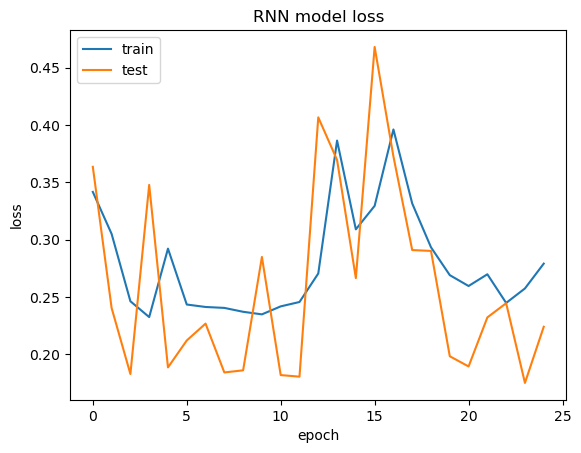

In [100]:
# summarize history for loss
plt.plot(history_RNN_model_1.history['loss'])
plt.plot(history_RNN_model_1.history['val_loss'])
plt.title('RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('my_dataset/performance/RNN_model_loss_60_40_5_gen_DF10.png')
plt.show()

In [82]:
#RNN_model_1.save('my_dataset/my_models/RNN_model_1.h5')

## LSTM.

In [35]:
def LSTM_model():   
    inputs = layers.Input(shape=(2_500,10))
    
    x1 = layers.LSTM(256, return_sequences=True)(inputs)
    x1 = layers.Dropout(.4)(x1)
    x2 = layers.LSTM(255)(x1)
    x2 = layers.Dropout(.2)(x2)
    
    outputs = layers.Dense(units=25_000, activation='linear')(x2)
    
    model = Model(inputs, outputs)
    rmse = tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)
    model.compile(optimizer="adam", loss='mean_squared_error' , metrics=[rmse])
    model.summary()
    return  model

In [36]:
LSTM_model_1 = LSTM_model()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2500, 10)]        0         
                                                                 
 lstm_6 (LSTM)               (None, 2500, 256)         273408    
                                                                 
 dropout_12 (Dropout)        (None, 2500, 256)         0         
                                                                 
 lstm_7 (LSTM)               (None, 255)               522240    
                                                                 
 dropout_13 (Dropout)        (None, 255)               0         
                                                                 
 dense_5 (Dense)             (None, 25000)             6400000   
                                                                 
Total params: 7,195,648
Trainable params: 7,195,648
Non-tra

In [14]:
%%time
history_LSTM_model_1 = LSTM_model_1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=25) 

Epoch 1/25
2/2 [==============================] - 264s 37s/step - loss: 0.3281 - root_mean_squared_error: 0.5728 - val_loss: 0.3779 - val_root_mean_squared_error: 0.6148
Epoch 2/25
2/2 [==============================] - 79s 17s/step - loss: 0.3193 - root_mean_squared_error: 0.5651 - val_loss: 0.3335 - val_root_mean_squared_error: 0.5775
Epoch 3/25
2/2 [==============================] - 79s 17s/step - loss: 0.2665 - root_mean_squared_error: 0.5162 - val_loss: 0.2086 - val_root_mean_squared_error: 0.4568
Epoch 4/25
2/2 [==============================] - 77s 17s/step - loss: 0.1703 - root_mean_squared_error: 0.4127 - val_loss: 0.1785 - val_root_mean_squared_error: 0.4224
Epoch 5/25
2/2 [==============================] - 79s 17s/step - loss: 0.1741 - root_mean_squared_error: 0.4173 - val_loss: 0.1811 - val_root_mean_squared_error: 0.4255
Epoch 6/25
2/2 [==============================] - 78s 17s/step - loss: 0.1679 - root_mean_squared_error: 0.4098 - val_loss: 0.1777 - val_root_mean_squared

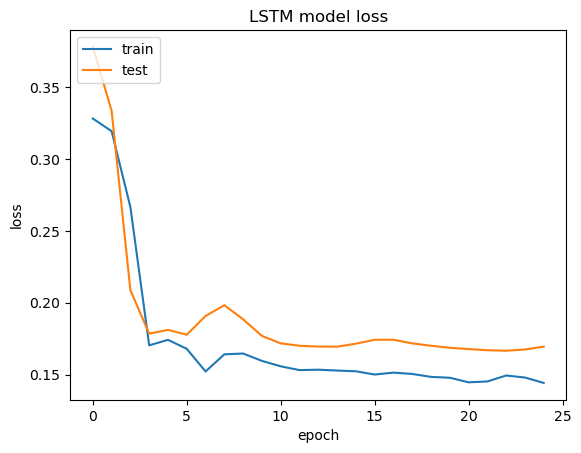

In [26]:
# summarize history for loss
plt.plot(history_LSTM_model_1.history['loss'])
plt.plot(history_LSTM_model_1.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('my_dataset/performance/LSTM_model_loss_60_40_5_gen_DF10.png')
plt.show()

In [27]:
LSTM_model_1.save('my_dataset/my_models/LSTM_model_1_DF10.h5')

## GRU.

In [31]:
def GRU_model():   
    inputs = layers.Input(shape=(2_500,10))
    
    x1 = layers.GRU(256, return_sequences=True)(inputs)
    x1 = layers.Dropout(0.4)(x1)
    x2 = layers.GRU(256)(x1)
    x2 = layers.Dropout(0.3)(x2)
    
    outputs = layers.Dense(units=25_000, activation='linear')(x2)
    outputs = layers.Dropout(0.3)(outputs)
    
    model = Model(inputs, outputs)
    rmse = tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)
    model.compile(optimizer="adam", loss='mean_squared_error' , metrics=[rmse])
    model.summary()
    return  model

In [23]:
GRU_model_1 = GRU_model()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2500, 10)]        0         
                                                                 
 gru_2 (GRU)                 (None, 2500, 256)         205824    
                                                                 
 dropout_5 (Dropout)         (None, 2500, 256)         0         
                                                                 
 gru_3 (GRU)                 (None, 256)               394752    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 25000)             6425000   
                                                                 
 dropout_7 (Dropout)         (None, 25000)             0   

In [24]:
%%time
history_GRU_model_1 = GRU_model_1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=25) 

Epoch 1/25
2/2 [==============================] - 91s 14s/step - loss: 0.3281 - root_mean_squared_error: 0.5728 - val_loss: 0.3782 - val_root_mean_squared_error: 0.6149
Epoch 2/25
2/2 [==============================] - 100s 12s/step - loss: 0.3209 - root_mean_squared_error: 0.5665 - val_loss: 0.3582 - val_root_mean_squared_error: 0.5985
Epoch 3/25
2/2 [==============================] - 88s 12s/step - loss: 0.2992 - root_mean_squared_error: 0.5470 - val_loss: 0.2961 - val_root_mean_squared_error: 0.5442
Epoch 4/25
2/2 [==============================] - 89s 12s/step - loss: 0.2431 - root_mean_squared_error: 0.4930 - val_loss: 0.1764 - val_root_mean_squared_error: 0.4200
Epoch 5/25
2/2 [==============================] - 92s 12s/step - loss: 0.2171 - root_mean_squared_error: 0.4660 - val_loss: 0.1764 - val_root_mean_squared_error: 0.4200
Epoch 6/25
2/2 [==============================] - 88s 12s/step - loss: 0.2050 - root_mean_squared_error: 0.4527 - val_loss: 0.2121 - val_root_mean_squared

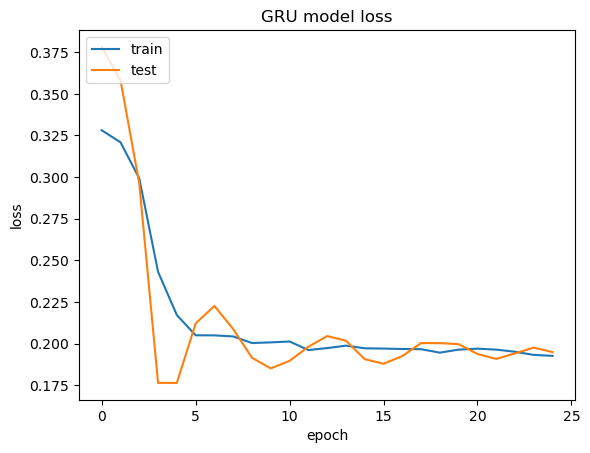

In [28]:
# summarize history for loss
plt.plot(history_GRU_model_1.history['loss'])
plt.plot(history_GRU_model_1.history['val_loss'])
plt.title('GRU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('my_dataset/performance/GRU_model_loss_60_40_5_gen_DF10.png')
plt.show()

In [29]:
GRU_model_1.save('my_dataset/my_models/GRU_model_DF10.h5')

# Transformers.

In [71]:
# build the model
def transformers():
    pass
    #inputs = layers.Input(shape=(2_500,10))
    #encoder = keras_nlp.layers.TransformerEncoder(intermediate_dim=64, num_heads=8)
    #x1 = layers.Transformer(units=16, d_model=32, num_heads=8, activation='relu')(inputs)
    #x1 = layers.Reshape((16, 32))(encoder)
    
    #outputs = layers.Dense(25_000, activation='linear')(x1)
    
    #model = Model(inputs, outputs)
    
    #rmse = tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None) 
    # compile and train the model
    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])
    #model.summary()
    #return model

In [72]:
#transformers_model = transformers()

AttributeError: module 'keras.api._v2.keras.layers' has no attribute 'Transformer'

In [ ]:
%%time
transformers_history = transformers_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=35) 

# Automate the process.

# Automate RNN in all Benchmarks.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2500, 10)]        0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 2500, 256)         68352     
                                                                 
 dropout (Dropout)           (None, 2500, 256)         0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 25000)             6425000   
                                                                 
 dropout_2 (Dropout)         (None, 25000)             0     

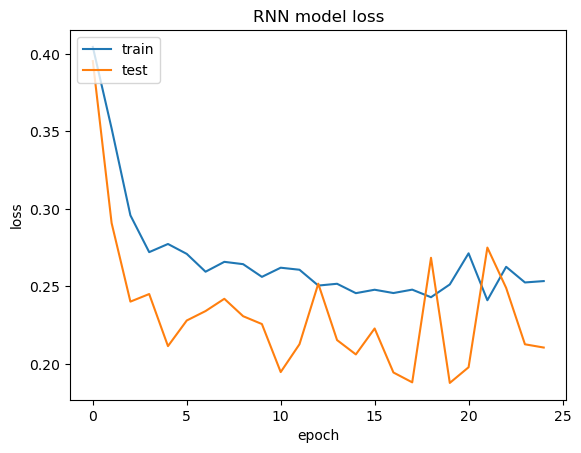

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2500, 10)]        0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 2500, 256)         68352     
                                                                 
 dropout_3 (Dropout)         (None, 2500, 256)         0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 25000)             6425000   
                                                                 
 dropout_5 (Dropout)         (None, 25000)             0   

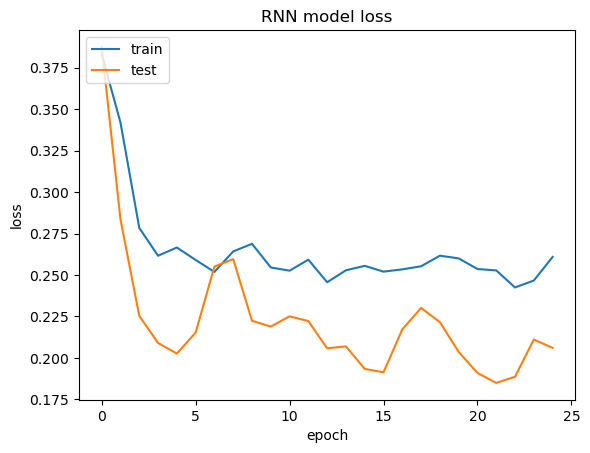

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2500, 10)]        0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 2500, 256)         68352     
                                                                 
 dropout_6 (Dropout)         (None, 2500, 256)         0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 25000)             6425000   
                                                                 
 dropout_8 (Dropout)         (None, 25000)             0   

KeyboardInterrupt: 

In [27]:
%%time
losses = [tf.keras.losses.LogCosh(),
          tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"),
          tf.keras.losses.Huber(delta=1.0, reduction="auto", name="huber_loss")]
DFs = [DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14]
for i in range(len(DFs)):
    path = 'my_dataset/X_and_y/'
    data_general_train = np.load(path+'data_general_train_df'+str(i+1)+'.npy', allow_pickle=True)
    labels_general_train = np.load(path+'labels_general_train_df'+str(i+1)+'.npy', allow_pickle=True)

    # Needs to Reshape Our y to a 1-D vector
    samples, cols, rows = labels_general_train.shape

    labels_general_train = np.reshape(labels_general_train, (samples, cols* rows) )

    X_train, X_test, y_train, y_test = train_test_split(data_general_train,
                                                        labels_general_train,
                                                        test_size=0.4, 
                                                        random_state=42,
                                                        shuffle=True)

    
    
    RNN_model_1 = RNN_model(loss=losses[1])#units 128 drops 0.3 loss <keras.losses.LogCosh
    
    history_RNN_model_1 = RNN_model_1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=25) 
    # summarize history for loss
    plt.plot(history_RNN_model_1.history['loss'])
    plt.plot(history_RNN_model_1.history['val_loss'])
    plt.title('RNN model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('my_dataset/performance/training/RNN/RNN_model_loss_60_40_5_gen_DF_'+ str(i+1)+'.png')
    plt.show()

    RNN_model_1.save('my_dataset/my_models/RNN_model_'+str(i+1)+'.h5')

# Automate LSTM in all Benchmarks.

In [ ]:
%%time

for i in range(1,15):
    path = 'my_dataset/X_and_y/'
    data_general_train = np.load(path+'data_general_train_df'+str(i)+'.npy', allow_pickle=True)
    labels_general_train = np.load(path+'labels_general_train_df'+str(i)+'.npy', allow_pickle=True)

    # Needs to Reshape Our y to a 1-D vector
    samples, cols, rows = labels_general_train.shape

    labels_general_train = np.reshape(labels_general_train, (samples, cols* rows) )

    X_train, X_test, y_train, y_test = train_test_split(data_general_train,
                                                        labels_general_train,
                                                        test_size=0.4, 
                                                        random_state=42,
                                                        shuffle=True)

    
    
    LSTM_model_1 = LSTM_model()
    
    history_LSTM_model = LSTM_model_1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=25) 
    # summarize history for loss
    plt.plot(history_LSTM_model.history['root_mean_squared_error'])
    plt.plot(history_LSTM_model.history['val_root_mean_squared_error'])
    plt.title('LSTM model loss')
    plt.ylabel('rmse loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('my_dataset/performance/LSTM_model_loss_60_40_5_gen_DF_'+ str(i)+'.png')
    plt.show()

    LSTM_model_1.save('my_dataset/my_models/LSTM_model_'+str(i)+'.h5')

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 2500, 10)]        0         
                                                                 
 lstm_10 (LSTM)              (None, 2500, 256)         273408    
                                                                 
 dropout_16 (Dropout)        (None, 2500, 256)         0         
                                                                 
 lstm_11 (LSTM)              (None, 255)               522240    
                                                                 
 dropout_17 (Dropout)        (None, 255)               0         
                                                                 
 dense_7 (Dense)             (None, 25000)             6400000   
                                                                 
Total params: 7,195,648
Trainable params: 7,195,648
Non-tra

# Automate GRU in all Benchmarks.

In [ ]:
%%time

for i in range(1,15):
    path = 'my_dataset/X_and_y/'
    data_general_train = np.load(path+'data_general_train_df'+str(i)+'.npy', allow_pickle=True)
    labels_general_train = np.load(path+'labels_general_train_df'+str(i)+'.npy', allow_pickle=True)

    # Needs to Reshape Our y to a 1-D vector
    samples, cols, rows = labels_general_train.shape

    labels_general_train = np.reshape(labels_general_train, (samples, cols* rows) )

    X_train, X_test, y_train, y_test = train_test_split(data_general_train,
                                                        labels_general_train,
                                                        test_size=0.4, 
                                                        random_state=42,
                                                        shuffle=True)

    
    
    GRU_model_1 = GRU_model()
    
    history_GRU_model = GRU_model_1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=25) 
    # summarize history for loss
    plt.plot(history_GRU_model.history['root_mean_squared_error'])
    plt.plot(history_v.history['val_root_mean_squared_error'])
    plt.title('GRU model loss')
    plt.ylabel('rmse loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('my_dataset/performance/GRU_model_loss_60_40_5_gen_DF_'+ str(i)+'.png')
    plt.show()

    GRU_model_1.save('my_dataset/my_models/GRU_model_'+str(i)+'.h5')